In [1]:
#Set up imports
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Set up splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|██████████| 6.58M/6.58M [00:00<00:00, 12.4MB/s]


In [3]:
# Visit the Quotes to Scrape site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Parse the HTML
html = browser.html
html_soup = BeautifulSoup(html, 'html.parser')

In [5]:
#scrape table
table = html_soup.find('table', class_='table')

In [6]:
#Put data into DF
df = pd.read_html('https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html')
df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
mars_df = df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
#Examine data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
#Change date column to datetime
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].astype('datetime64', copy=True)
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
#How many months exist on Mars?
months_on_mars = mars_df['month'].max()
print ("There are ", months_on_mars, " months on Mars.")

There are  12  months on Mars.


In [11]:
#How many Martian (and not Earth) days worth of data exist in the scraped dataset? find dif from min and max in sol column 
sol_min = mars_df['sol'].min()
sol_max = mars_df['sol'].max()
sol_count = sol_max - sol_min
print ("There are ", sol_count, " sols worth of data.")

There are  1967  sols worth of data.


Text(0.5, 1.0, 'Coldest and Warmest Months')

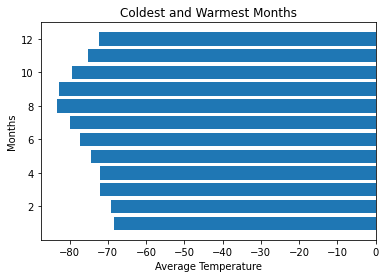

In [24]:
#What are the coldest and the warmest months on Mars (at the location of Curiosity)? Get the answer by averaging the minimum daily temperature of all the months. Plot the results as a bar chart. 
x_axis_monthtemp = (mars_df['month'].unique()).tolist()
y_axis_monthtemp = (mars_df.groupby('month')['min_temp'].mean()).tolist()

plt.barh(x_axis_monthtemp, y_axis_monthtemp)
         
plt.xlabel("Average Temperature")
plt.ylabel("Months")

plt.title("Coldest and Warmest Months")

Text(0, 0.5, 'Months')

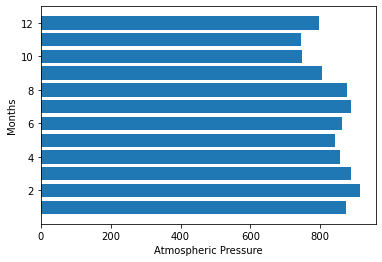

In [25]:
#Which months have the lowest and the highest atmospheric pressure on Mars? Get the answer by averaging the daily atmospheric pressure of all the months. Plot the results as a bar chart.
x_axis_press = (mars_df['month'].unique()).tolist()
y_axis_press = (mars_df.groupby('month')['pressure'].mean()).tolist()

plt.barh(x_axis_press, y_axis_press)
         
plt.xlabel("Atmospheric Pressure")
plt.ylabel("Months")

Text(0.5, 1.0, 'Temperature on Mars')

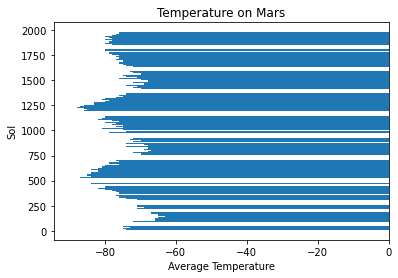

In [31]:
#About how many terrestrial (Earth) days exist in a Martian year? That is, in the time that Mars circles the Sun once, how many days elapse on Earth? Visually estimate the result by plotting the daily minimum temperature.
x_axis_days = (mars_df['sol'].unique()).tolist()
y_axis_days = (mars_df.groupby('sol')['min_temp'].mean()).tolist()

plt.barh(x_axis_days, y_axis_days)
         
plt.xlabel("Average Temperature")
plt.ylabel("Sol")
# plt.set_xticks(['terrestrial_date'])
plt.title("Temperature on Mars")

In [ ]:
#Save DF to CSV
mars_df.to_csv('mars_temp')

In [32]:
#Close Browser
browser.quit()